In [1]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data, columns=boston.feature_names)
y = pd.Series(boston.target)

In [3]:
data_train, data_test, y_train, y_test = train_test_split(data, y, test_size = 0.1, random_state = 1)

In [4]:
# Determine how each column correlates to target values
abs(data_train.corrwith(y_train, axis= 0))

CRIM       0.389118
ZN         0.367062
INDUS      0.497763
CHAS       0.166618
NOX        0.436703
RM         0.686342
AGE        0.389308
DIS        0.262110
RAD        0.382028
TAX        0.470526
PTRATIO    0.507624
B          0.332673
LSTAT      0.738141
dtype: float64

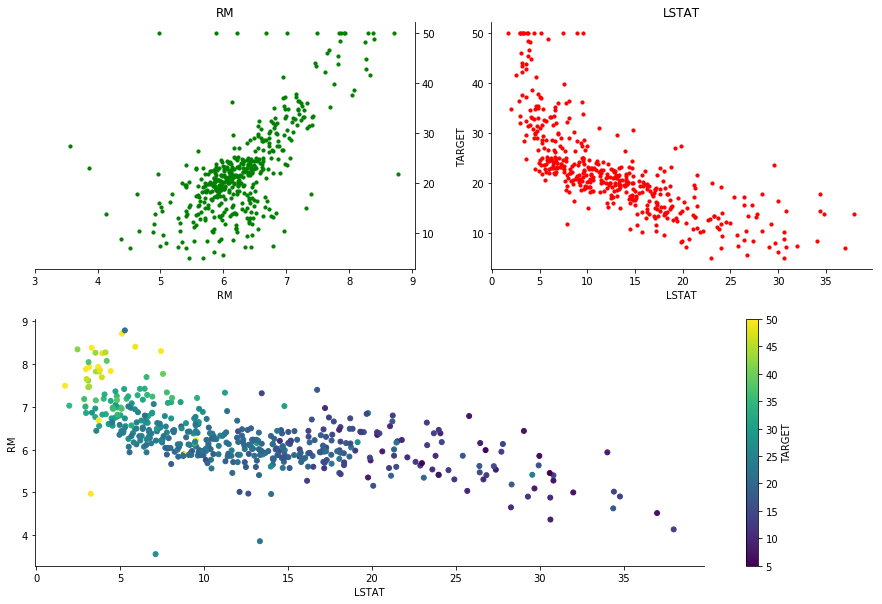

In [5]:
# Two features with the highest correlation ratio are RM and LSTAT
fig = plt.figure()
fig.set_size_inches(15, 10)
ax1 = plt.subplot(221)
ax2 = plt.subplot(222)
ax3 = plt.subplot(212)

ax1.scatter(data_train["RM"], y_train, c = "g", s=10) 
ax1.set_title("RM")
ax1.spines['top'].set_visible(False)
ax1.spines['left'].set_visible(False)
ax1.set_xlabel("RM")
ax1.yaxis.tick_right()
ax1.set_xlim(3)

ax2.scatter(data_train["LSTAT"], y_train, c = "r", s=10)
ax2.set_title("LSTAT")
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.set_xlabel("LSTAT")
ax2.set_ylabel("TARGET")

f = ax3.scatter(data_train["LSTAT"],data_train["RM"], c = y_train, s=25)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xlabel("LSTAT")
ax3.set_ylabel("RM")
fig.colorbar(f).set_label("TARGET")

In [13]:
X_train = data_train[["RM"]]
X_test = data_test[["RM"]]

y_test_rm = y_test.iloc[X_test["RM"].argsort()]
X_test = X_test.iloc[X_test["RM"].argsort()]

z = {}
r2 = []
n = [1,2,3,5,7,10,15,50,200]
for i in n:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    z[i]= model.predict(X_test)
    r2.append(r2_score(y_test_rm, z[i]))

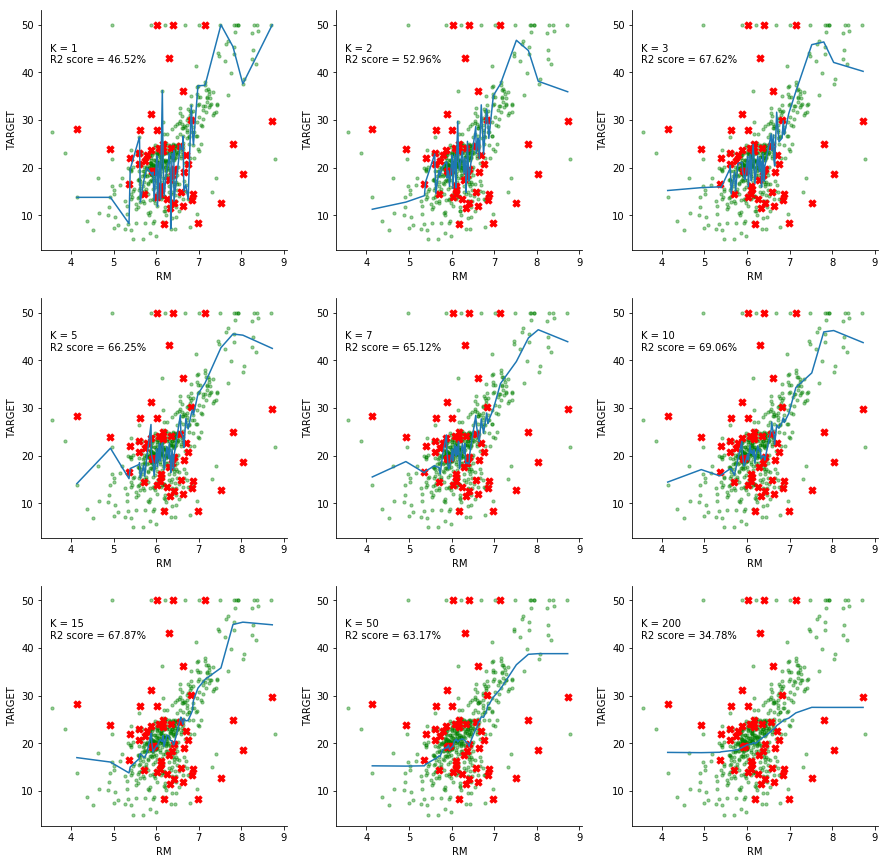

In [15]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = []
for i, r in enumerate(r2):
    ax.append(plt.subplot(3,3,i+1))
    ax[i].scatter(X_train, y_train, c = "g", s = 10, alpha = 0.4)
    ax[i].scatter(X_test, y_test, c = "r", marker="X", s = 50)
    ax[i].plot(X_test, z[n[i]])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xlabel("RM")
    ax[i].set_ylabel("TARGET")
    ax[i].text(3.5,42,"K = %d\nR2 score = %.2f%%" %(n[i], r*100))

In [8]:
X_train = data_train[["LSTAT"]]
X_test = data_test[["LSTAT"]]

y_test_lstat = y_test.iloc[X_test["LSTAT"].argsort()]
X_test = X_test.iloc[X_test["LSTAT"].argsort()]

z = {}
r2 = []
n = [1,2,3,5,7,10,15,50,200]
for i in n:
    model = KNeighborsRegressor(n_neighbors = i)
    model.fit(X_train, y_train)
    z[i]= model.predict(X_test)
    r2.append(r2_score(y_test_lstat, z[i]))

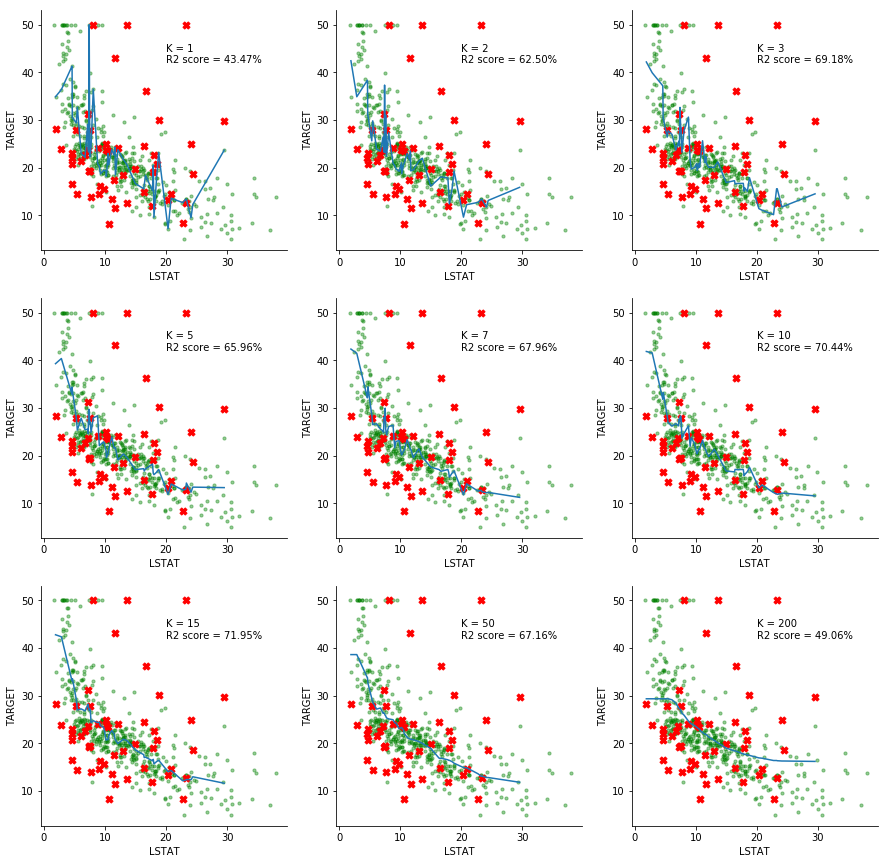

In [10]:
fig = plt.figure()
fig.set_size_inches(15, 15)
ax = []
for i, r in enumerate(r2):
    ax.append(plt.subplot(3,3,i+1))
    ax[i].scatter(X_train, y_train, c = "g", s = 10, alpha = 0.4)
    ax[i].scatter(X_test, y_test, c = "r", marker="X", s = 50)
    ax[i].plot(X_test, z[n[i]])
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_xlabel("LSTAT")
    ax[i].set_ylabel("TARGET")
    ax[i].text(20,42,"K = %d\nR2 score = %.2f%%" %(n[i], r*100))